In [2]:
import pygor.filehandling
import pygor.load
%reload_ext autoreload
%autoreload 2
# Test

# Get data, run analyses, and yield DataFrames

In [3]:
files = pygor.filehandling.find_files_in(".h5", r"..\src\pygor\examples", match = "demo", recursive=True) #"ColoursSWN"
files = files
files

[WindowsPath('../src/pygor/examples/strf_demo_data.h5')]

In [4]:
obj = pygor.filehandling.load(files[0], as_class = pygor.load.STRF)
obj.get_help(hints=True, types=True)

C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes\core_data.py:76: UserWarning: 'Averages0' not found in ..\src\pygor\examples\strf_demo_data.h5, setting to np.nan
  self.averages = try_fetch(HDF5_file, "Averages0")
C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes\core_data.py:77: UserWarning: 'Snippets0' not found in ..\src\pygor\examples\strf_demo_data.h5, setting to np.nan
  self.snippets = try_fetch(HDF5_file, "Snippets0")
C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes\strf_data.py:63: UserWarning: Rotation detected and corrected for ..\src\pygor\examples\strf_demo_data.h5
  self.strfs = pygor.data_helpers.load_strf(HDF5_file)



Welcome to your data object! 
Below are attributes and methods, as well as some metadata.
Pass 'hint = True' for more tips and hints on using the data class.
    ## Class info:
        Current data type: 
        'STRF'
        Current metadata: 
       { 'exp_date': datetime.date(2023, 11, 7),
         'exp_time': datetime.time(17, 3, 37),
         'filename': '..\\src\\pygor\\examples\\strf_demo_data.h5',
         'objectiveXYZ': (-125190.0, -71909.0, -119340.0)}

    - You can access these via self.data_types or self.metadata, respectively.
        Here, 'self' referes to the variable name you give your Data object.
    - All attributes (data) and methods (actions) are accessed likewise.
    
    ## Attributes
        Here's the data you have access to -> pass 'types = True' for type hints, attr (type):
    [ 'averages (NoneType)', 'bs_bool (bool)', 'bs_settings (dict)', 'filename (WindowsPath)', 'frame_hz (float)',
      'images (ndarray)', 'ipl_depths (ndarray)', 'metadata (dict)

# Load pre-saved data

In [7]:
""" TODO
"""

' TODO\n'

# Analysis

In [3]:
import pygor.strf.analyse

In [8]:
files = pygor.filehandling.find_files_in(".h5", r"D:\Igor analyses\SWN", recursive=True, match = "SWN") #"ColoursSWN"
files = files
files

[WindowsPath('D:/Igor analyses/SWN/230613/0_0_ColorSWN_200_0/2023-6-13_0_0_ColourSWN_200_0.h5'),
 WindowsPath('D:/Igor analyses/SWN/230613/0_1_ColorSWN_200_0/2023-6-13_0_1_ColourSWN_200_0.h5'),
 WindowsPath('D:/Igor analyses/SWN/230614/0_0_ColorSWN_200_0/2023-6-14_0_0_ColorSWN_200_0.h5'),
 WindowsPath('D:/Igor analyses/SWN/230614/0_1_ColorSWN_200_0/2023-6-14_SMP_0_2_ColourSWN_200_0.h5'),
 WindowsPath("D:/Igor analyses/SWN/230614/0_2_ColorSWN_200_0/2023-6-14_'0_2_ColourSWN_200_0'.h5"),
 WindowsPath("D:/Igor analyses/SWN/230718/0_1_ColorSWN_200_0/2023-7-18_'0_1_ColourSWN_200_0'.h5"),
 WindowsPath('D:/Igor analyses/SWN/230718/0_4_ColorSWN_200_0/2023-7-18_ColourSWN_200_0_4.h5'),
 WindowsPath("D:/Igor analyses/SWN/230731/0_1_ColourSWN_200_0/2023-7-31_'0_1_ColourSWN_200_0'.h5"),
 WindowsPath("D:/Igor analyses/SWN/230801/0_0_ColourSWN_0/2023-8-1_'0_0_ColourSWN_200_0'.h5"),
 WindowsPath("D:/Igor analyses/SWN/230802/0_1_ColourSWN_0/2023-8-2_'0_1_ColourSWN_200_0'.h5"),
 WindowsPath("D:/Igor anal

In [19]:
# Instantiate the object list 
list_of_objs = pygor.filehandling.load_list(files, as_class = pygor.load.STRF, bs_bool = True)
list_of_objs

Iterating through and loading listed files:   0%|          | 0/17 [00:00<?, ?it/s]

Output()

[13-06-2023:STRF:2023-6-13_0_0_ColourSWN_200_0,
 13-06-2023:STRF:2023-6-13_0_1_ColourSWN_200_0,
 14-06-2023:STRF:2023-6-14_0_0_ColorSWN_200_0,
 14-06-2023:STRF:2023-6-14_SMP_0_2_ColourSWN_200_0,
 14-06-2023:STRF:2023-6-14_'0_2_ColourSWN_200_0',
 18-07-2023:STRF:2023-7-18_'0_1_ColourSWN_200_0',
 18-07-2023:STRF:2023-7-18_ColourSWN_200_0_4,
 31-07-2023:STRF:2023-7-31_'0_1_ColourSWN_200_0',
 01-08-2023:STRF:2023-8-1_'0_0_ColourSWN_200_0',
 02-08-2023:STRF:2023-8-2_'0_1_ColourSWN_200_0',
 02-08-2023:STRF:2023-8-2_'0_1_ColourSWN_200_1H',
 07-11-2023:STRF:2023-11-7_0_0_ColourSWN_200,
 07-11-2023:STRF:2023-11-7_0_2_ColourSWN_200_1,
 07-11-2023:STRF:2023-11-7_0_4_ColourSWN_200,
 07-11-2023:STRF:2023-11-7_MP_0_3_ColourSWN_200_,
 08-11-2023:STRF:2023-11-8_MP_0_0_ColourSWN_200_,
 14-11-2023:STRF:2023-11-14_0_0_SWN_200_Colours]

In [12]:
exp = pygor.load.Experiment(list_of_objs)

In [14]:
exp.recording_id

,id,name,date,num_rois,type,path
0,0,2023-6-13_0_0_ColourSWN_200_0,13-06-2023,59,STRF,D:\Igor analyses\SWN\230613\0_0_ColorSWN_200_0...
1,1,2023-6-13_0_1_ColourSWN_200_0,13-06-2023,19,STRF,D:\Igor analyses\SWN\230613\0_1_ColorSWN_200_0...
2,2,2023-6-14_0_0_ColorSWN_200_0,14-06-2023,62,STRF,D:\Igor analyses\SWN\230614\0_0_ColorSWN_200_0...
3,3,2023-6-14_SMP_0_2_ColourSWN_200_0,14-06-2023,31,STRF,D:\Igor analyses\SWN\230614\0_1_ColorSWN_200_0...
4,4,2023-6-14_'0_2_ColourSWN_200_0',14-06-2023,31,STRF,D:\Igor analyses\SWN\230614\0_2_ColorSWN_200_0...
5,5,2023-7-18_'0_1_ColourSWN_200_0',18-07-2023,13,STRF,D:\Igor analyses\SWN\230718\0_1_ColorSWN_200_0...
6,6,2023-7-18_ColourSWN_200_0_4,18-07-2023,20,STRF,D:\Igor analyses\SWN\230718\0_4_ColorSWN_200_0...
7,7,2023-7-31_'0_1_ColourSWN_200_0',31-07-2023,22,STRF,D:\Igor analyses\SWN\230731\0_1_ColourSWN_200_...
8,8,2023-8-1_'0_0_ColourSWN_200_0',01-08-2023,26,STRF,D:\Igor analyses\SWN\230801\0_0_ColourSWN_0\20...
9,9,2023-8-2_'0_1_ColourSWN_200_0',02-08-2023,13,STRF,D:\Igor analyses\SWN\230802\0_1_ColourSWN_0\20...


In [15]:
chroma_df = pygor.strf.analyse.chromatic_stats(exp)
chroma_df

C:\Users\SimenLab\Git_repos\pygor\src\pygor\strf\contouring.py:183: UserWarning: Passed array did not meet absolute threshold criteria of 1
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
C:\Users\SimenLab\Git_repos\pygor\src\pygor\strf\contouring.py:183: UserWarning: Passed array did not meet absolute threshold criteria of 1
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
C:\Users\SimenLab\Git_repos\pygor\src\pygor\strf\analyse.py:269: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\SimenLab\Git_repos\pygor\src\pygor\strf\contouring.py:183: UserWarning: Passed array did not meet absolute threshold criteria of 1
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
C:\Users\SimenLab\Git_repos\pygor\src\pygor\strf

,date,path,filename,curr_path,strf_keys,cell_id,size,ipl_depths,opp_bool,ampl_375,...,peakpos_478,peakpos_588,pol_375,pol_422,pol_478,pol_588,roi,spatial_X,spatial_Y,temporal_len
0,2023-06-13,D:\Igor analyses\SWN\230613\0_0_ColorSWN_200_0...,2023-6-13_0_0_ColourSWN_200_0.h5,D:\Igor analyses\SWN\230613\0_0_ColorSWN_200_0...,STRF0_0,2023-6-13_0_0_ColourSWN_200_006-13-2023_STRF0_0,200,74.0,True,2.587312,...,0.000,0.000,2.0,1.0,-1.0,-1.0,0,24,40,4
1,2023-06-13,D:\Igor analyses\SWN\230613\0_0_ColorSWN_200_0...,2023-6-13_0_0_ColourSWN_200_0.h5,D:\Igor analyses\SWN\230613\0_0_ColorSWN_200_0...,STRF0_1,2023-6-13_0_0_ColourSWN_200_006-13-2023_STRF0_1,200,10.0,True,3.062069,...,1.040,0.975,1.0,1.0,2.0,2.0,1,24,40,4
2,2023-06-13,D:\Igor analyses\SWN\230613\0_0_ColorSWN_200_0...,2023-6-13_0_0_ColourSWN_200_0.h5,D:\Igor analyses\SWN\230613\0_0_ColorSWN_200_0...,STRF0_2,2023-6-13_0_0_ColourSWN_200_006-13-2023_STRF0_2,200,48.0,True,5.168010,...,1.040,1.040,1.0,1.0,2.0,2.0,2,24,40,4
3,2023-06-13,D:\Igor analyses\SWN\230613\0_0_ColorSWN_200_0...,2023-6-13_0_0_ColourSWN_200_0.h5,D:\Igor analyses\SWN\230613\0_0_ColorSWN_200_0...,STRF0_3,2023-6-13_0_0_ColourSWN_200_006-13-2023_STRF0_3,200,67.0,True,-1.998763,...,0.000,0.000,2.0,2.0,-1.0,-1.0,3,24,40,4
4,2023-06-13,D:\Igor analyses\SWN\230613\0_0_ColorSWN_200_0...,2023-6-13_0_0_ColourSWN_200_0.h5,D:\Igor analyses\SWN\230613\0_0_ColorSWN_200_0...,STRF0_4,2023-6-13_0_0_ColourSWN_200_006-13-2023_STRF0_4,200,90.0,True,1.796746,...,0.000,0.000,2.0,-1.0,-1.0,-1.0,4,24,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,STRF0_6,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_6,200,24.0,True,6.347869,...,1.040,1.040,1.0,1.0,2.0,1.0,6,24,40,4
550,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,STRF0_7,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_7,200,26.0,True,5.630309,...,1.040,0.845,1.0,1.0,2.0,2.0,7,24,40,4
551,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,STRF0_8,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_8,200,21.0,True,7.080145,...,1.105,0.000,1.0,2.0,1.0,-1.0,8,24,40,4
552,2023-11-14,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,D:\Igor analyses\SWN\231114\2023-11-14_0_0_SWN...,STRF0_9,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_9,200,23.0,True,5.840235,...,0.910,1.040,1.0,1.0,2.0,1.0,9,24,40,4


In [16]:
import pygor.strf.plot

C:\Users\SimenLab\Git_repos\pygor\src\pygor\utilities.py:173: UserWarning: Destructive method. You lose data, with no way of recovering original shape!
  warnings.warn("Destructive method. You lose data, with no way of recovering original shape!")
C:\Users\SimenLab\Git_repos\pygor\src\pygor\utilities.py:173: UserWarning: Destructive method. You lose data, with no way of recovering original shape!
  warnings.warn("Destructive method. You lose data, with no way of recovering original shape!")
C:\Users\SimenLab\Git_repos\pygor\src\pygor\utilities.py:173: UserWarning: Destructive method. You lose data, with no way of recovering original shape!
  warnings.warn("Destructive method. You lose data, with no way of recovering original shape!")
C:\Users\SimenLab\Git_repos\pygor\src\pygor\utilities.py:173: UserWarning: Destructive method. You lose data, with no way of recovering original shape!
  warnings.warn("Destructive method. You lose data, with no way of recovering original shape!")
C:\Users

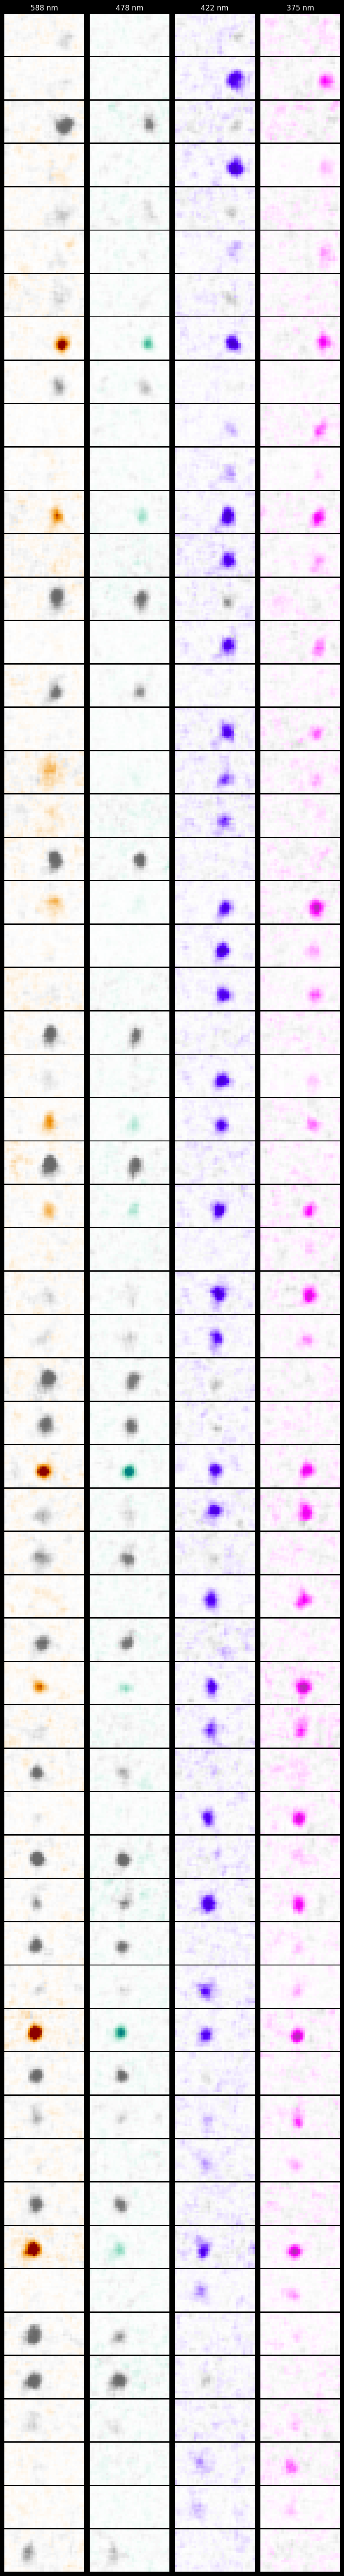

In [18]:
pygor.strf.plot.chroma_overview(list_of_objs[0])